## 1. 객체 지향 프로그래밍이란?

- 프로그램을 명령어들의 목록이 아닌, 객체들의 모임으로서
- 객체와 객체와의 상호 관계를 중심으로 작성하자는 paradime

## 2. 객체와 클래스

- 객체 object
- 속성 attribute과 행위 action를 가지며, 이름을 붙일 수 있는 물체
- ex) 자동차, 학생, 스마트폰 등

- 클래스 class : 객체를 만들기위한 설계도 blueprint

- 인스턴스 instance : 설계도에 따라 실제로 구현된 것
- 인스턴스화 == 실체화 == 메모리에 구축
- 클래스를 실체화 / 인스턴스화 시킨 것이 바로 객체 !

ex) class Programmer():
        pass
    kim = programmer()
    
kim 이라는 객체는 Programmer라는 클래스의 인스턴스

### 객체 생성 예

In [3]:
student = {'name': 'Gabie', 'year': 21, 'class': 3, 'stu_id': 20180305}
print(student['name'], student['year'], student['class'], student['stu_id'])

Gabie 21 3 20180305


In [6]:
class Student(object):
    def __init__ (self, name, year, class_num, stu_id):
        self.name = name
        self.year = year
        self.class_num = class_num
        self.stu_id = stu_id
        
    def introduce_myself(self):
        print(self.name, self.year, self.class_num, self.stu_id)
        
student = Student('고혜정', 21, 3 ,20180305)
student.introduce_myself()

고혜정 21 3 20180305


### 필요한 데이터에 접근하는 또 다른 방법

In [7]:
%%writefile stdu.py

name = 'Gabie'
year = 2
class_num = 3
student_id = 20180305

Writing stdu.py


In [8]:
import stdu
print(stdu.name, stdu.year, stdu.class_num, stdu.student_id)

Gabie 2 3 20180305


### Class

- class 클래스_이름:
        클래스_본체
- 클래스명은 각 단어의 첫 문자를 대문자로 하는 CapWords 방식
        
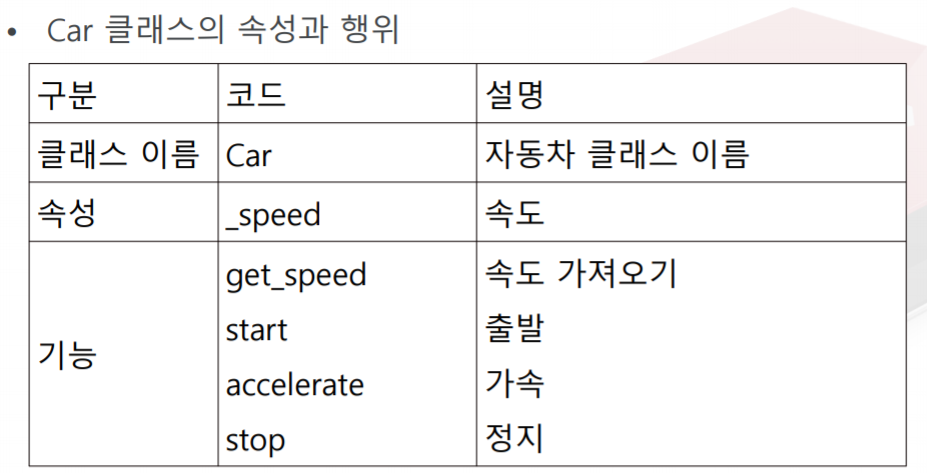

In [12]:
%%writefile car_example.py

class Car:
    def __init__(self):
        self._speed = 0
        print("Car is here")
        
    def get_speed(self):
        return self._speed
    
    def start(self):
        self._speed = 20
        print("Car is goind to depart")
        
    def accelerate(self):
        self._speed = self._speed + 30
        print("Too fast")
        
    def stop(self):
        self._speed = 0
        print("stop")
        
if __name__ == "__main__":
    my_car = Car()  #Car 객체 생성, my_car 이름 부여
    my_car.start()  #my_car가 가진 start 메소드 호출
    print("speed:", my_car.get_speed())
    my_car.accelerate()
    print("speed:", my_car.get_speed())
    my_car.stop()
    print("speed:", my_car.get_speed())

Overwriting car_example.py


In [13]:
%run car_example.py

Car is here
Car is goind to depart
speed: 20
Too fast
speed: 50
stop
speed: 0


### 3 self

- self는 객체 자신을 가리키는 특별한 변수
- 현재 인스턴스 객체를 가리키는 것으로,
- c++ / 자바의 this 키워드와 동일 but 예약어로 지정은 안 함
- 객체 메소드에는 반드시! 첫번째 인자로 self가 와야 함 !!!!

In [14]:
class Person:
    Name = "Default Name 고혜정"
    def Print(self):
        print("My name is {0}".format(self.Name))

In [15]:
p1 = Person()
p1.Print()

My name is Default Name 고혜정


In [16]:
p1.Name = "민경훈"
p1.Print()

My name is 민경훈


In [17]:
Person.Print(p1)

My name is 민경훈


## Bount Method Call

- 에러 발생 이유 : func1은 인자가 없는데 1개 받았다고 함.
- 즉, 첫번째 인자로 항상 인스턴스가 전달되기 때문에 발생

In [19]:
class Foo:
    def func1():
        print("Function 1")
    def func2(self):
        print("function 2")

In [20]:
f = Foo()
f.func2()

function 2


In [21]:
f.func1()

TypeError: func1() takes 0 positional arguments but 1 was given

In [22]:
id(f)

2455496486336

In [23]:
f.func2()

function 2


In [24]:
f2 = Foo()
id(f2)

2455496484848

In [25]:
f2.func2()

function 2


In [26]:
Foo.func1()

Function 1


In [27]:
Foo.func2()

TypeError: func2() missing 1 required positional argument: 'self'

#### 파이썬 클래스 자체가 하나의 네임 스페이스이므로 인스턴스의 생성과 무관하게 클래스 내의 메소드 호출 가능
#### 클래스와 인스턴스의 네임 스페이스가 분리

In [28]:
f3 = Foo()
id(f3)

2455496483888

In [29]:
Foo.func2(f3)

function 2


In [30]:
f3.func2()

function 2


## 왜 OOP인가?

- 각각의 결과값을 유지해야 하는 2개의 계산기가 필요한 경우 함수 두 개로 해결했지만, 점점 더 많이 필요해진다면?
- 현실적으로 계속 전역변수와 함수를 추가할 수 없음
- oop는 객체를 생성하기만 하면 되기 때문에 매우 간단

In [31]:
result1 = 0
result2 = 0

def adder1(num):
    global result1
    result1 += num
    return result1

def adder2(num):
    global result2
    result2 += num
    return result2

print(adder1(3))
print(adder1(4))
print(adder2(3))
print(adder2(7))

3
7
3
10


In [32]:
class Calculator:
    def __init__(self):
        self.result = 0
        
    def adder(self, num):
        self.result += num
        return self.result

cal1 = Calculator()
cal2 = Calculator()

print(cal1.adder(3))
print(cal1.adder(4))
print(cal2.adder(3))
print(cal2.adder(7))

3
7
3
10


## 사칙연산 실습

In [33]:
class FourCal:
    def __init__(self, first, second):
        self.first = first
        self.second = second
    def sum(self):
        result = self.first + self.second
        return result
    def mul(self):
        result = self.first * self.second
        return result
    def sub(self):
        result = selt.first - self.second
        return result
    def div(self):
        result = self.first / self.second
        return result

In [34]:
a = FourCal(4, 2)
b = FourCal(3, 7)
a.sum()

6

In [35]:
a.mul()

8

## Class Members

- method
- Property @
- class variable
- instance variable
- Initializer __init__
- Destructor __del__

- 데이터를 표현하는 field와 행위를 표현하는 methond로 구분
- 파이썬에서 이러한 field와 method 모두 객체의 attribute
- 새로운 attribute를 동적으로 추가 가능
- 메소드도 일종의 메소드 객체로 취급하여 attribute에 포함됨

## Initializer __init__()

- 클래스로부터 새 객체가 생성될 때마다 실행되는 특별한 메소드(magic method)
- 인스턴스 변수의 초기화, 객체의 초기 상태를 만듦
- python에서 클래스 생성자(Constructor)는 실제 런타임 엔진 내부에서 실행
- 생성자 실행 도중 클래스 안에 Initializer가 있는지 체크하여
- 만약 있으면 Initializer를 호출하여 객체의 변수 등을 초기화

## Destructor 소멸자 __del__

- 클래스로부터 객체가 소멸할 대 호출되는 특별한 메소드
- 객체의 reference counter(참조 카운터)가 0이 되면 자동 호출
- 리소스 해제 등의 종료 작업 수행

In [36]:
class IceCream:
    def __init__(self, name, price):
        self.name = name
        self.price = price
        print(name + "의 가격은 " + str(price) + "원 입니다")
    def __del__(self):
        print(self.name + "객체가 사라집니다")

In [37]:
obIce = IceCream("누가바", 800)

누가바의 가격은 800원 입니다


In [38]:
ob3Ice = IceCream("월드콘", 1000)

월드콘의 가격은 1000원 입니다


In [39]:
del ob3Ice

월드콘객체가 사라집니다


In [40]:
obIce_copy = obIce

In [43]:
del obIce

In [44]:
del obIce_copy

누가바객체가 사라집니다


#### 객체의 reference counter가 1 이상이면 del 구문을 사용해도 destructor가 호출되지 않음

In [46]:
class Employee(object):
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first.lower() + '.' + last.lower() + '@sogang.ac.kr'
        
    def full_name(self):
        print(self.first + ' ' + self.last)
        
emp_1 = Employee('Jiho', 'Lee', 50000)
emp_2 = Employee('Minjung', 'Kim', 60000)
print(emp_1.email)
print(emp_2.email)
# emp_1의 풀네임 출력
emp_1.full_name()

jiho.lee@sogang.ac.kr
minjung.kim@sogang.ac.kr
Jiho Lee


In [47]:
class Employee(object):
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first.lower() + '.' + last.lower() + '@sogang.ac.kr'
        
    def __del__(self):
        print(self.last + "퇴사")
        
    def full_name(self):
        print(self.first + ' ' + self.last)

In [48]:
emp_1 = Employee('Jiho', 'Lee', 50000)
emp_2 = Employee('Minjung', 'Kim', 60000)
print(emp_1.email)
print(emp_2.email)
# emp_1의 풀네임 출력
emp_1.full_name()

jiho.lee@sogang.ac.kr
minjung.kim@sogang.ac.kr
Jiho Lee


In [49]:
del emp_1

Lee퇴사
